In [8]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Perform API Calls

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Los Angeles"
units = "metric"

query_url = f"{url}appid={api_key}&q={city}&units={units}"
# Get the names of lists, dictionaries, and tuples
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.05, 'lon': -118.24},
 'dt': 1532383080,
 'id': 5368361,
 'main': {'humidity': 43,
          'pressure': 1012,
          'temp': 33.74,
          'temp_max': 40,
          'temp_min': 26},
 'name': 'Los Angeles',
 'sys': {'country': 'US',
         'id': 416,
         'message': 0.0061,
         'sunrise': 1532350722,
         'sunset': 1532401192,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'smoke',
              'icon': '50d',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'speed': 2.6}}


In [11]:
# Starting URL for Weather Map API Call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q="

cities = pd.DataFrame({"City": cities})
cities["Max Temp"] = ""
cities["Humidity"] = ""
cities["Cloudiness"] = ""
cities["Wind Speed"] = ""
cities["Lat"] = ""
cities["Lng"] = ""
cities["Country"] = ""

for index, row in cities.iterrows():
    city = row["City"]
    response = requests.get(url + city).json()
    
    try:
        print(f"Searching Data {index + 1} of {len(cities)} | {city}")
        print(url + city)
        
        cities.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities.loc[index, "Humidity"] = response["main"]["humidity"]
        cities.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities.loc[index, "Lat"] = response["coord"]["lat"]
        cities.loc[index, "Lng"] = response["coord"]["lon"]
        cities.loc[index, "Country"] = response["sys"]["country"]
    
        
    except (KeyError, IndexError):
        print("City Not Found")
        
print("-------------------------")
print("Data Requests Complete")
print("-------------------------")

Searching Data 1 of 626 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=east london
Searching Data 2 of 626 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=jamestown
Searching Data 3 of 626 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mar del plata
Searching Data 4 of 626 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=rikitea
Searching Data 5 of 626 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ribeira grande
Searching Data 6 of 626 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=busselton
Searching Data 7 of 626 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imp

Searching Data 58 of 626 | chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=chicama
Searching Data 59 of 626 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=biak
Searching Data 60 of 626 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=taolanaro
City Not Found
Searching Data 61 of 626 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=iskateley
Searching Data 62 of 626 | ngama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ngama
City Not Found
Searching Data 63 of 626 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=faanui
Searching Data 64 of 626 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Searching Data 113 of 626 | pangody
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=pangody
Searching Data 114 of 626 | mahibadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mahibadhoo
Searching Data 115 of 626 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=lorengau
Searching Data 116 of 626 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=kapaa
Searching Data 117 of 626 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=necochea
Searching Data 118 of 626 | stornoway
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=stornoway
City Not Found
Searching Data 119 of 626 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Impe

Searching Data 169 of 626 | zalesovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=zalesovo
Searching Data 170 of 626 | mehran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mehran
Searching Data 171 of 626 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=kruisfontein
Searching Data 172 of 626 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=amahai
Searching Data 173 of 626 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=bengkulu
City Not Found
Searching Data 174 of 626 | mbaiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mbaiki
Searching Data 175 of 626 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Impe

Searching Data 224 of 626 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=vestmanna
Searching Data 225 of 626 | charlottesville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=charlottesville
Searching Data 226 of 626 | wageningen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=wageningen
Searching Data 227 of 626 | irece
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=irece
Searching Data 228 of 626 | gazli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=gazli
Searching Data 229 of 626 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=vaitupu
City Not Found
Searching Data 230 of 626 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?

Searching Data 278 of 626 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=quatre cocos
Searching Data 279 of 626 | chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=chara
Searching Data 280 of 626 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=sibolga
Searching Data 281 of 626 | lumberton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=lumberton
Searching Data 282 of 626 | zigong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=zigong
Searching Data 283 of 626 | mineros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=mineros
Searching Data 284 of 626 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af1

Searching Data 333 of 626 | soissons
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=soissons
Searching Data 334 of 626 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=harper
Searching Data 335 of 626 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=bowen
Searching Data 336 of 626 | eufaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=eufaula
Searching Data 337 of 626 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=poum
Searching Data 338 of 626 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=touros
Searching Data 339 of 626 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76

Searching Data 389 of 626 | hakui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=hakui
Searching Data 390 of 626 | jizan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=jizan
Searching Data 391 of 626 | bulaevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=bulaevo
Searching Data 392 of 626 | birjand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=birjand
Searching Data 393 of 626 | goodlettsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=goodlettsville
Searching Data 394 of 626 | suhbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=suhbaatar
Searching Data 395 of 626 | youkounkoun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Searching Data 444 of 626 | wairoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=wairoa
Searching Data 445 of 626 | gurskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=gurskoye
City Not Found
Searching Data 446 of 626 | langarud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=langarud
Searching Data 447 of 626 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=fairbanks
Searching Data 448 of 626 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=banda aceh
Searching Data 449 of 626 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=nantucket
Searching Data 450 of 626 | pinawa
http://api.openweathermap.org/data/2.5/weather?units

Searching Data 499 of 626 | rutana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=rutana
Searching Data 500 of 626 | krasnyy oktyabr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=krasnyy oktyabr
Searching Data 501 of 626 | balykshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=balykshi
City Not Found
Searching Data 502 of 626 | damietta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=damietta
Searching Data 503 of 626 | lhuntshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=lhuntshi
City Not Found
Searching Data 504 of 626 | ust-nera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=ust-nera
Searching Data 505 of 626 | dingle
http://api.openweathermap.org/d

Searching Data 555 of 626 | brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=brigantine
Searching Data 556 of 626 | hinganghat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=hinganghat
Searching Data 557 of 626 | gravdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=gravdal
Searching Data 558 of 626 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=santiago
Searching Data 559 of 626 | oytal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=oytal
Searching Data 560 of 626 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=kirakira
Searching Data 561 of 626 | jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086a

Searching Data 610 of 626 | coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=coahuayana
Searching Data 611 of 626 | santa luzia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=santa luzia
Searching Data 612 of 626 | erdenet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=erdenet
Searching Data 613 of 626 | edgewater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=edgewater
Searching Data 614 of 626 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=bandarbeyla
Searching Data 615 of 626 | wrzesnia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6086af157e4d9fcc1dd554a76f33f4d4&q=wrzesnia
Searching Data 616 of 626 | kununurra
http://api.openweathermap.org/data/2.5/weather?units

In [12]:
#Removing cities not found
cities = cities[cities["Country"] != ""]
cities.head()

,City,Max Temp,Humidity,Cloudiness,Wind Speed,Lat,Lng,Country
0,east london,71.57,89,32,12.46,-33.02,27.91,ZA
1,jamestown,53.57,62,0,14.81,-33.21,138.6,AU
2,mar del plata,47.63,58,0,14.7,-46.43,-67.52,AR
3,rikitea,74.18,100,92,17.27,-23.12,-134.97,PF
4,ribeira grande,71.3,100,44,16.04,38.52,-28.7,PT


In [13]:
# Export file into CSV
cities.to_csv(output_data_file, index = False, header = True)

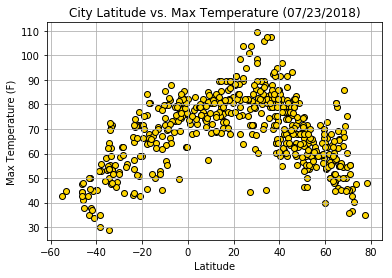

In [14]:
plt.scatter(cities["Lat"],cities["Max Temp"], marker="o", facecolor="gold", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")

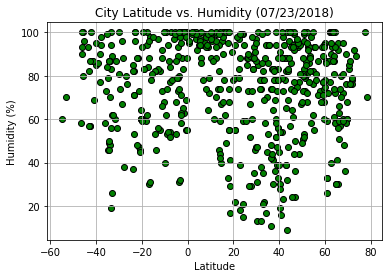

In [15]:
plt.scatter(cities["Lat"], cities["Humidity"], marker="o", facecolor="green", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/city_latitude_vs_humidity.png")

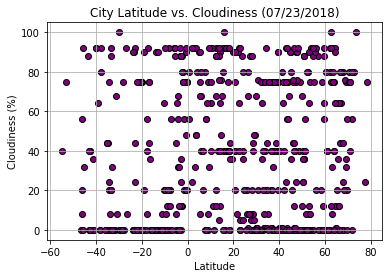

In [16]:
plt.scatter(cities["Lat"], cities["Cloudiness"], marker="o", facecolor="purple", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/city_latitude_vs_cloudiness")

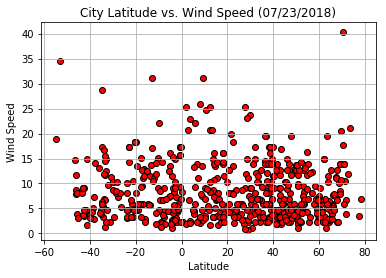

In [17]:
plt.scatter(cities["Lat"], cities["Wind Speed"], marker="o", facecolor="red", edgecolor="black")
date = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/city_latitude_vs_wind_speed")